In [1]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("datasets/kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# 각 컬럼의 통계치 확인
df.describe()

# 결측치가 있거나 이상치가 있으면 보정 및 제거를 해주어야 한다. 이에 대한 내용은 앞의 데이터 전처리 및 파생변수 생성 부분에서 자세히 다루었기 때문에 생략한다.

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


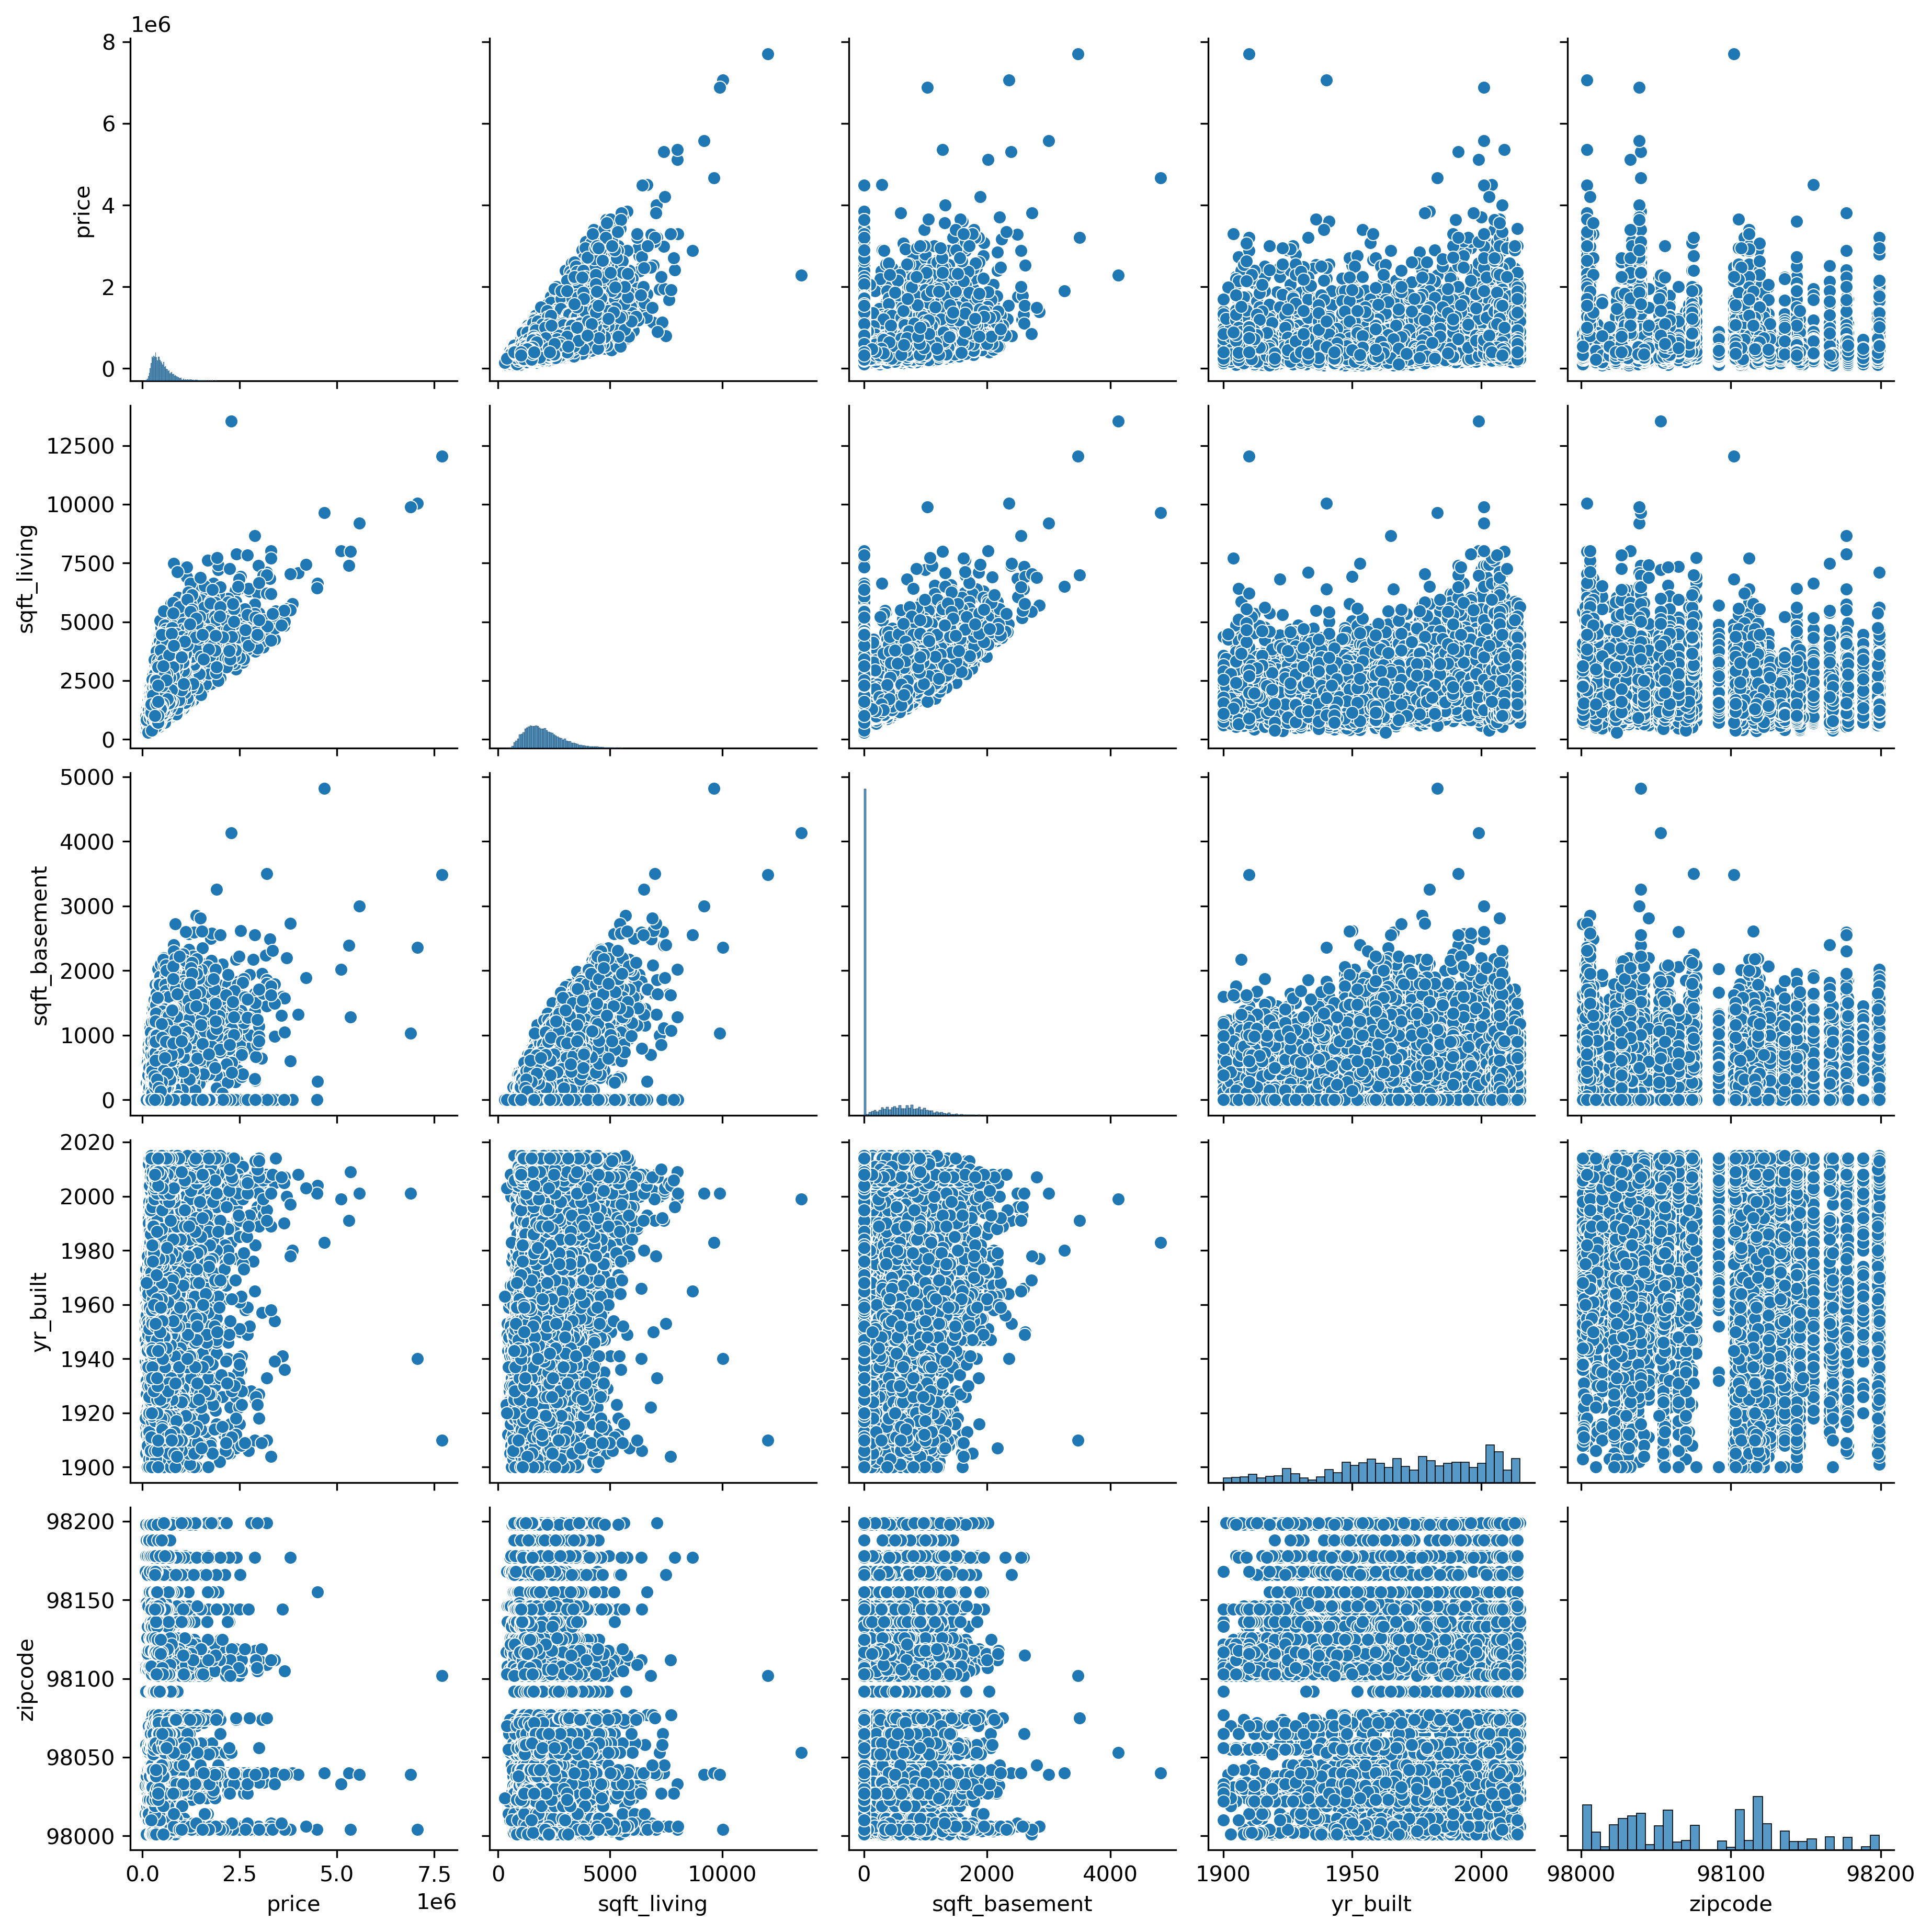

In [5]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()

In [6]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [8]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  15129
test data 개수:  6484


In [9]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 
# 앞서 설치했던 sklearn의 LinearRegression을 학습데이터에 적용 해준다. 학습 데이터를 통해 price를 예측할 수 있는 회귀계수가 생성된다. 
# fit_intercept 인수는 모형에 상수항을 넣을지 말지를 설정해 주는 명령어다. 기본 값은 True라서 상수항을 빼지 않을 거라면, 생략해도 된다.

LinearRegression()

In [10]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

In [11]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.70


In [12]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

# 그런데 LinearRegression 패키지는 R스퀘어 등 자세한 모델 결과치 확인이 어렵다. 수식을 코딩해주면 가능하지만, 여간 번거로운 일이 아니다. 
# 그래서 자세한 모델 결과값을 확인하고 싶을 때는 OLS(Ordinary Least Squares) 패키지를 사용하면 편리하다.

[5905170.26323962]
[[-4.04278815e+04  4.41345118e+04  1.12285390e+02  1.33649230e-01
   6.39986628e+03  5.71220651e+05  4.76076256e+04  2.68327180e+04
   9.66052229e+04  7.10823539e+01  4.12030351e+01 -2.65613516e+03
   1.57961389e+01 -5.72702851e+02  6.01491770e+05 -2.14480305e+05
   1.73045742e+01 -3.50042299e-01]]


In [13]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2080.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:38:00   Log-Likelihood:            -2.0595e+05
No. Observations:               15129   AIC:                         4.119e+05
Df Residuals:                   15111   BIC:                         4.121e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.905e+06   3.44e+06      1.718      0.086   -8.34e+05    1.26e+07
bedrooms      -4.043e+04   2316.164    -17.455      0.000    -4.5e+04   -3.59e+04
bathrooms      4.413e+04   3807.246     11.592      0.000    3.67e+04    5.16e+04
sqft_living     112.2854      2.683     41.855      0.000     107.027     117.544
sqft_lot          0.1336      0.057      2.343      0.019       0.022       0.245
floors         6399.8663   4227.013      1.514      0.130   -1885.591    1.47e+04
waterfront     5.712e+05   2.05e+04     27.851      0.000    5.31e+05    6.11e+05
view           4.761e+04   2532.806     18.796      0.000    4.26e+04    5.26e+04
condition      2.683e+04   2763.807      9.709      0.000    2.14e+04    3.23e+04
grade          9.661e+04   2539.879     38.035      0.000    9.16e+04    1.02e+05
sqft_above       71.0824      2.664     26.681      0.000      65.860      76.305
sqft_basement    41.2031      3.108     13.257      0.000      35.111      47.295
yr_built      -2656.1352     85.053    -31.229      0.000   -2822.849   -2489.421
yr_renovated     15.7961      4.261      3.707      0.000       7.445      24.148
zipcode        -572.7029     38.828    -14.750      0.000    -648.810    -496.596
lat            6.015e+05   1.26e+04     47.603      0.000    5.77e+05    6.26e+05
long          -2.145e+05   1.56e+04    -13.778      0.000   -2.45e+05   -1.84e+05
sqft_living15    17.3046      4.052      4.271      0.000       9.363      25.246
sqft_lot15       -0.3500      0.086     -4.058      0.000      -0.519      -0.181
==============================================================================
Omnibus:                    11994.537   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           939620.154
Skew:                           3.250   Prob(JB):                         0.00
Kurtosis:                      41.057   Cond. No.                     1.15e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

In [15]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[2.44082428e+10]
[[ 1.23180975e+07 -1.25928926e+07  9.44699379e+03 -2.87255391e+02
  -4.47261224e+07  1.02238301e+08  2.84398569e+06 -8.54907697e+05
  -1.10462427e+07  2.13680292e+04 -3.57904578e+04 -3.11710448e+04
   2.09017268e+04 -5.23256772e+05  8.51675066e+07  1.10256256e+07
  -1.78248791e+04  3.89132349e+02  1.05017034e+03  4.39646860e+03
   2.63805867e+01  8.64152813e-02  1.74754833e+04 -1.75472121e+04
   1.90326735e+03 -2.86944704e+03 -1.73027279e+03 -5.16762222e+01
  -4.66205947e+01 -1.47673889e+02 -1.16420662e+00 -2.76414467e+01
  -3.38492461e+04  6.29202828e+04  4.05016881e+00 -7.60612396e-04
  -6.40067597e+03  8.52706722e+00 -3.65108450e-01 -4.50175562e+04
   7.47248418e+04  3.56546501e+03 -4.21098803e+03  1.21688000e+04
   7.52840344e+00  3.69300798e+00  4.55056906e+02 -3.82134270e+01
  -1.12331539e+02  8.26794409e+04 -1.53212010e+05  2.78968224e+01
   5.16042446e-02  1.59610571e+02 -1.49626853e+02  1.09176408e+01
   5.41294165e+01 -1.08085117e+01  1.24224380e+01  2.225937

In [16]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))

학습셋 R-Square: 0.83
테스트셋 R-Square: 0.82


In [17]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))

ridge_train R2: 0.701
ridge_test R2: 0.697
ridge001_train R2: 0.701
ridge001_test R2: 0.697
ridge100_train R2: 0.692
ridge100_test R2: 0.688


In [18]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))

C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.678e+14, tolerance: 1.975e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.677e+14, tolerance: 1.975e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+14, toleranc

lasso_train R2: 0.701
lasso_test R2: 0.697
num_of_IV: 18
lasso001_train R2: 0.701
lasso001_test R2: 0.697
num_of_IV: 18
lasso10000_train R2: 0.628
lasso10000_test R2: 0.629
num_of_IV: 13


In [19]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.004e+14, tolerance: 1.975e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.532e+14, tolerance: 1.975e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\angry\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.623e+14, toleranc

elast_train R2: 0.619
lasso_test R2: 0.619
num_of_IV: 18
elast001_train R2: 0.544
elast001_test R2: 0.547
num_of_IV: 18
elast10000_train R2: 0.628
elast10000_test R2: 0.629
num_of_IV: 13
